**Problem Statement**:
 Understanding Fatalities in Israel-Palestine Conflict

**Project Overview** :
The Israel-Palestine conflict has been marked by periods of intense hostilities, resulting in numerous fatalities. As a data scientist and machine learning engineer, your task is to analyze the provided dataset containing information on fatalities in Israel and Palestine. The goal is to derive meaningful insights from the data to better understand the dynamics of these incidents. The dataset includes details such as date, location, demographics, injuries, weapons used, and more.

Project Objectives :

Fatality Trends Analysis:

Explore the dataset to identify trends in fatalities over time.
Detect significant changes, spikes, or declines in the number of fatalities.
Demographic Analysis:

Conduct an in-depth demographic analysis by examining the age, gender, and citizenship of the individuals killed.
Determine if there are any notable patterns or disparities in the data.
Geospatial Analysis:

Utilize the geographical information to perform a geospatial analysis.
Visualize the distribution of fatalities on a map and identify areas with higher levels of violence.
Hostilities Participation Analysis:

Investigate the extent of individuals' participation in hostilities before their deaths.
Analyze the relationship between participation and the circumstances surrounding each fatality.
Injury Analysis:

Examine the types of injuries inflicted on individuals.
Identify the most common types of injuries and assess their severity.
Weapons Used Analysis:

Analyze the ammunition and means by which individuals were killed.
Determine the most frequently used weapons or methods and evaluate their impact.
Victim Profiles:

Create profiles of the victims based on available data such as age, gender, citizenship, and place of residence.
Identify common characteristics among the victims.

Dataset:
The dataset is provided in CSV format and includes the following columns:

Date
Location (including district and region information)
Age
Gender
Citizenship
Participation in hostilities
Type of injuries
Weapons used
Other relevant information

Deliverables:

Exploratory Data Analysis (EDA) report.
Visualizations depicting trends, demographics, geospatial distribution, hostilities participation, injuries, weapons used, and victim profiles.
Insights and conclusions derived from the analysis.
Optionally, machine learning models to predict trends or classify certain characteristics based on available data.

In [ ]:
pip install pandas matplotlib seaborn folium


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Read and Analyse Data



In [ ]:
df = pd.read_csv('fatalities.csv')

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6633 entries, 0 to 6632
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          6633 non-null   object 
 1   date_of_event                 6633 non-null   object 
 2   age                           6588 non-null   float64
 3   citizenship                   6633 non-null   object 
 4   event_location                6633 non-null   object 
 5   event_location_district       6633 non-null   object 
 6   event_location_region         6633 non-null   object 
 7   date_of_death                 6632 non-null   object 
 8   gender                        6632 non-null   object 
 9   took_part_in_the_hostilities  5254 non-null   object 
 10  place_of_residence            6620 non-null   object 
 11  place_of_residence_district   6620 non-null   object 
 12  type_of_injury                6459 non-null   object 
 13  amm

In [ ]:
# Explore the first few rows of the dataset
print(df.head())

                                          name date_of_event   age  \
0  'Abd a-Rahman Suleiman Muhammad Abu Daghash    2023-09-24  32.0   
1         Usayed Farhan Muhammad 'Ali Abu 'Ali    2023-09-24  21.0   
2             'Abdallah 'Imad Sa'ed Abu Hassan    2023-09-22  16.0   
3             Durgham Muhammad Yihya al-Akhras    2023-09-20  19.0   
4                 Raafat 'Omar Ahmad Khamaisah    2023-09-19  15.0   

   citizenship     event_location event_location_district  \
0  Palestinian     Nur Shams R.C.                 Tulkarm   
1  Palestinian     Nur Shams R.C.                 Tulkarm   
2  Palestinian           Kfar Dan                   Jenin   
3  Palestinian  'Aqbat Jaber R.C.                 Jericho   
4  Palestinian         Jenin R.C.                   Jenin   

  event_location_region date_of_death gender took_part_in_the_hostilities  \
0             West Bank    2023-09-24      M                          NaN   
1             West Bank    2023-09-24      M              

In [ ]:
# prompt: # describe basic statistics of data df.describe()

df.describe()


,age
count,6588.000000
mean,26.485276
std,14.067447
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


Missing Value Analysis

In [ ]:
# missing value
df.isnull().sum()

name                               0
date_of_event                      0
age                               45
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      1
gender                             1
took_part_in_the_hostilities    1379
place_of_residence                13
place_of_residence_district       13
type_of_injury                   174
ammunition                      2604
killed_by                          1
notes                             52
dtype: int64

Exploratory Data Analysis

In [ ]:
date_column = 'date_of_event'

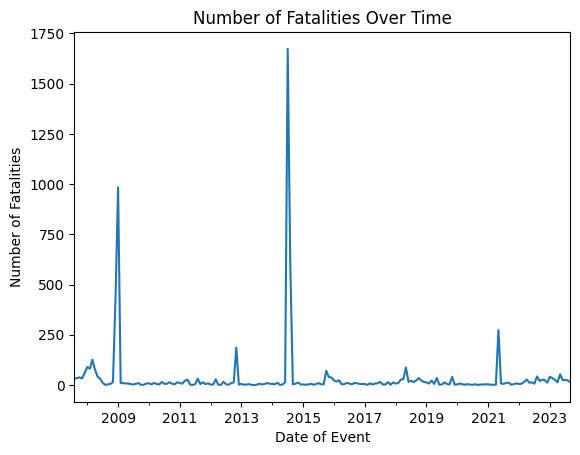

In [ ]:
# Task 2: Exploratory Data Analysis (EDA)
# Visualize temporal trends
try:
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df = df.dropna(subset=[date_column])  # Drop rows with invalid date values
    df.set_index(date_column, inplace=True)
    df.resample('M').size().plot(legend=False)
    plt.title('Number of Fatalities Over Time')
    plt.xlabel('Date of Event')
    plt.ylabel('Number of Fatalities')
    plt.show()
except pd.errors.OutOfBoundsDatetime:
    print(f"Skipping visualizations due to invalid date values in column {date_column}")

Demographic Analysis

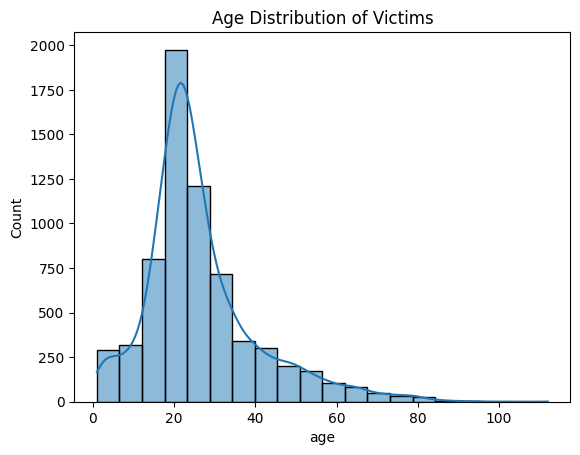

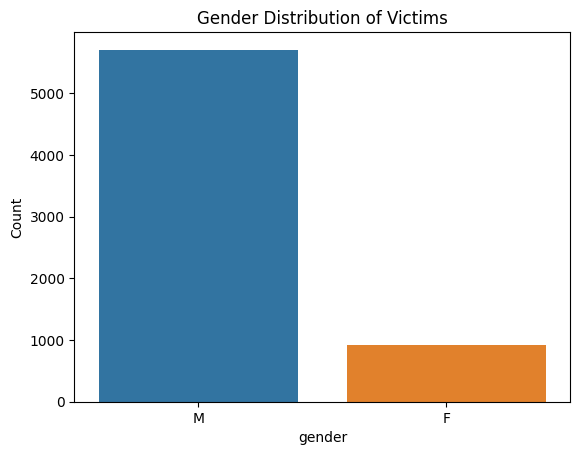

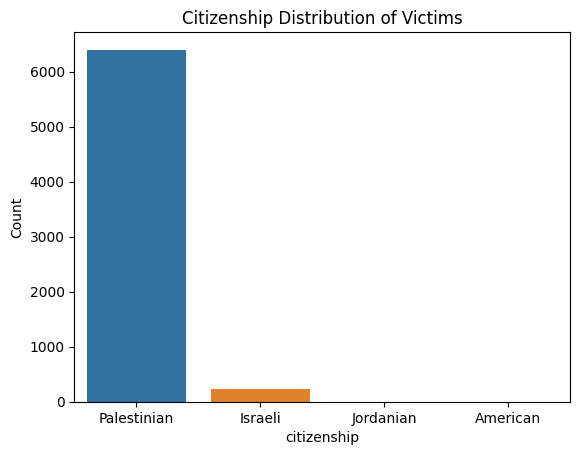

In [ ]:
# Visualize age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Victims')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

# Visualize gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Victims')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

# Visualize citizenship distribution
sns.countplot(x='citizenship', data=df)
plt.title('Citizenship Distribution of Victims')
plt.xlabel('citizenship')
plt.ylabel('Count')
plt.show()


Geospatial Analysis

In [ ]:
# Create an interactive map using Folium
fatalities_map = folium.Map(location=[32, 35], zoom_start=8)

# Add markers for each fatality
for index, row in df.iterrows():
    location_name = row['event_location']
    region_name = row['event_location_region']
    date_of_event = row['date_of_death']  # Use the correct column name for date_of_death
    if not pd.isnull(location_name) and not pd.isnull(region_name) and not pd.isnull(date_of_event):
        # You might need to geocode 'location_name' or use external geospatial data for accurate latitude and longitude
        # For simplicity, we'll use a fixed location for illustration
        folium.Marker([32, 35],  # Replace with actual latitude and longitude
                      popup=f"Date of Event: {date_of_event}, Location: {location_name}, Region: {region_name}").add_to(fatalities_map)

# Save the map as an HTML file
fatalities_map.save('fatalities_map.html')


Temporal Trends and Time Series Analysis

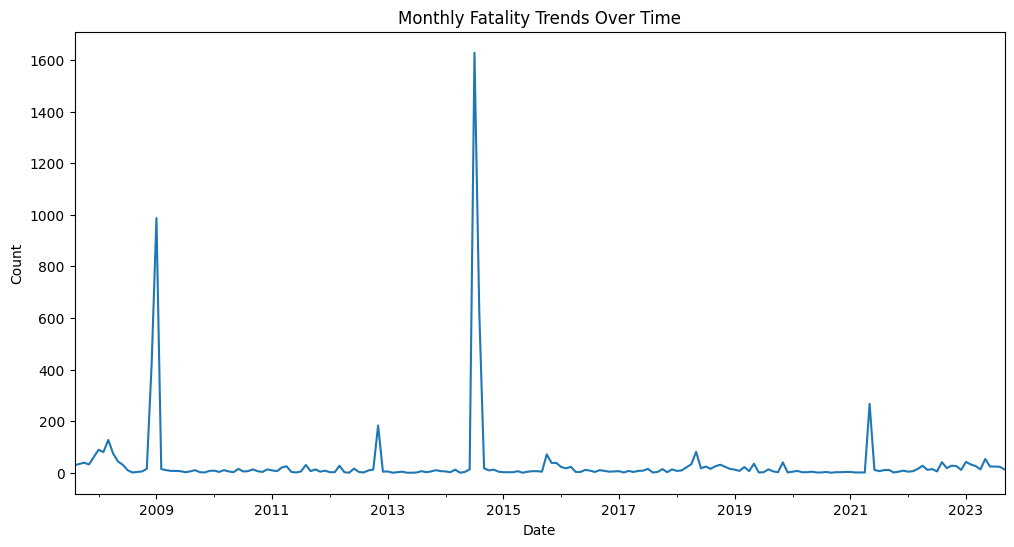

In [ ]:
# Time series analysis
df['date_of_death'] = pd.to_datetime(df['date_of_death'])
df.set_index('date_of_death', inplace=True)
plt.figure(figsize=(12, 6))
df.resample('M').size().plot(legend=False)
plt.title('Monthly Fatality Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


Demographic Analysis

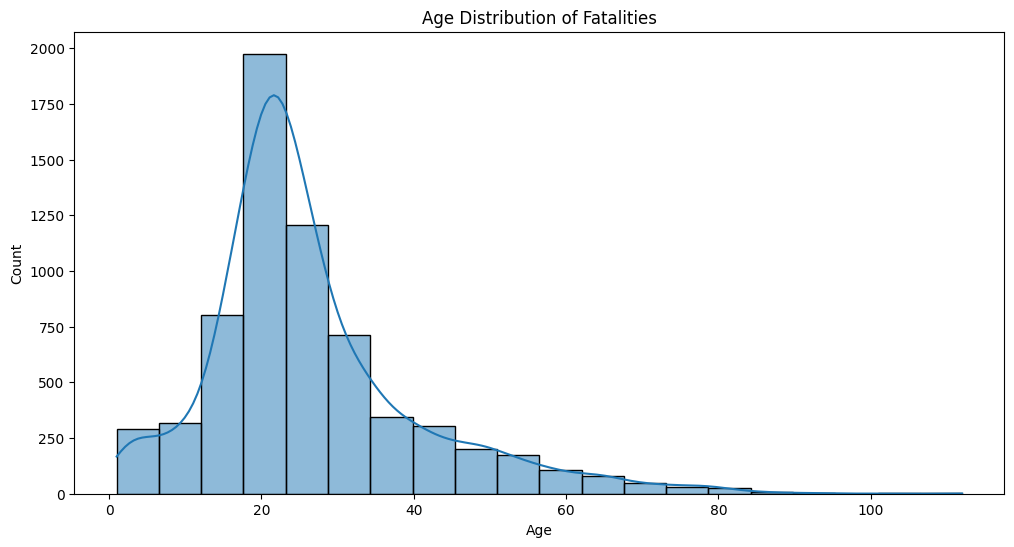

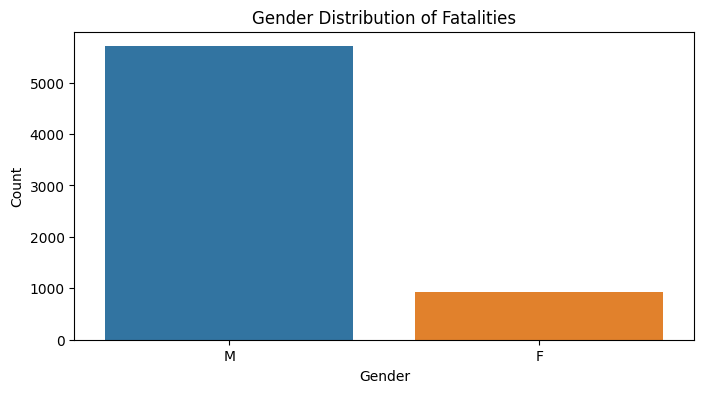

In [ ]:
# Demographic analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Fatalities')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Fatalities')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Hostilities Participation Analysis

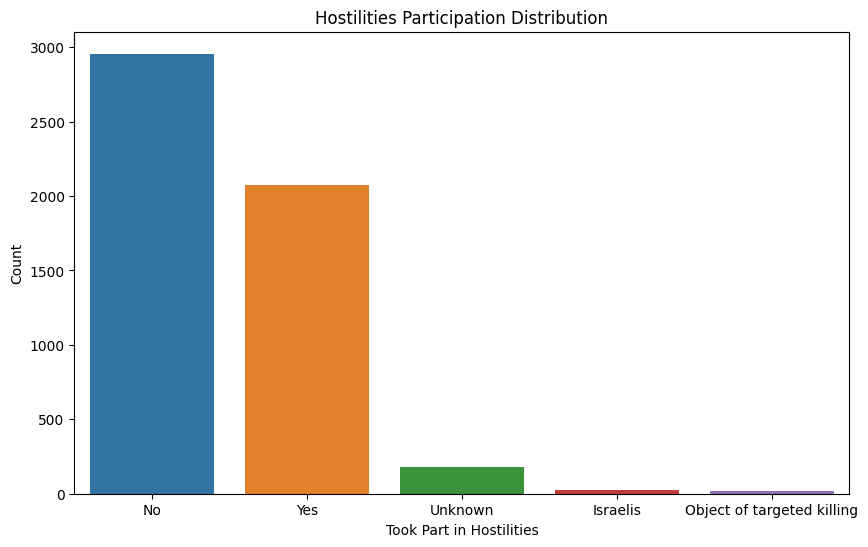

In [ ]:
# Hostilities participation analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='took_part_in_the_hostilities', data=df)
plt.title('Hostilities Participation Distribution')
plt.xlabel('Took Part in Hostilities')
plt.ylabel('Count')
plt.show()


Injury Analysis and Severity

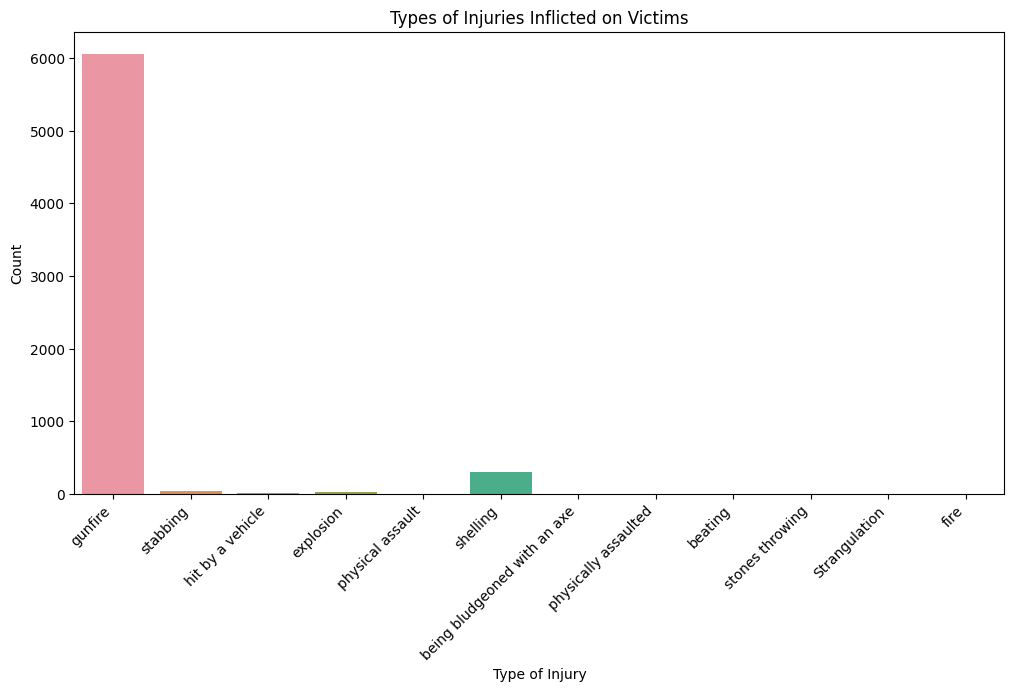

In [ ]:
# Injury analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='type_of_injury', data=df)
plt.title('Types of Injuries Inflicted on Victims')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Weapons Used Analysis

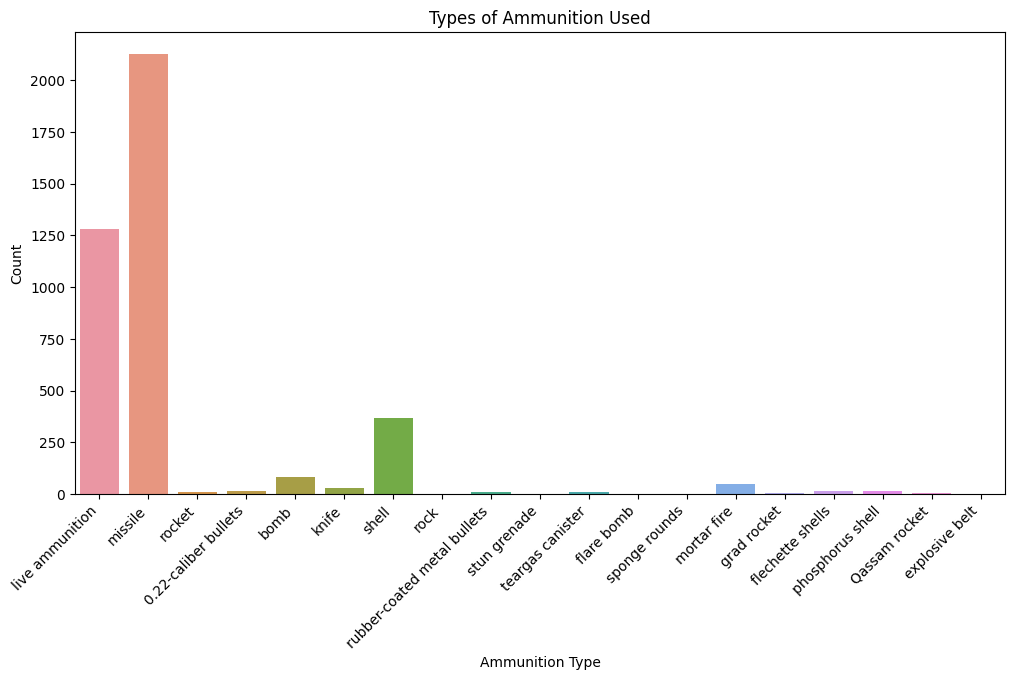

In [ ]:
# Weapons used analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='ammunition', data=df)
plt.title('Types of Ammunition Used')
plt.xlabel('Ammunition Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Victim Profiles

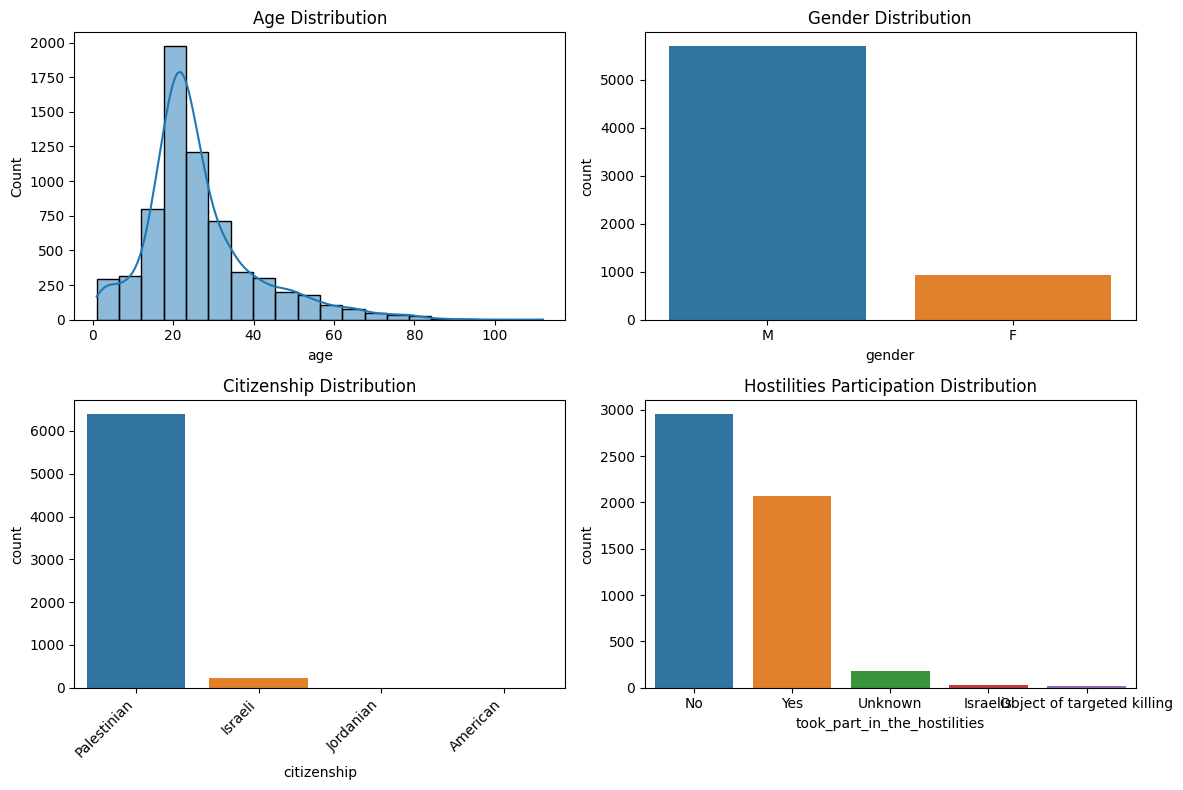

Summary Statistics for Victim Profiles:
                age gender  citizenship took_part_in_the_hostilities  \
count   6633.000000   6632         6633                         5254   
unique          NaN      2            4                            5   
top             NaN      M  Palestinian                           No   
freq            NaN   5706         6397                         2956   
mean      26.485276    NaN          NaN                          NaN   
std       14.019640    NaN          NaN                          NaN   
min        1.000000    NaN          NaN                          NaN   
25%       19.000000    NaN          NaN                          NaN   
50%       23.000000    NaN          NaN                          NaN   
75%       31.000000    NaN          NaN                          NaN   
max      112.000000    NaN          NaN                          NaN   

       place_of_residence type_of_injury ammunition                killed_by  
count           

In [ ]:

def victim_profile_analysis(df):
    # Extract relevant columns
    victim_data = df[['age', 'gender', 'citizenship', 'took_part_in_the_hostilities',
                      'place_of_residence', 'type_of_injury', 'ammunition', 'killed_by']]

    # Basic summary statistics
    summary_stats = victim_data.describe(include='all')

    # Visualizations
    plt.figure(figsize=(12, 8))

    # Age distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title('Age Distribution')

    # Gender distribution
    plt.subplot(2, 2, 2)
    sns.countplot(x='gender', data=victim_data)
    plt.title('Gender Distribution')

    # Citizenship distribution
    plt.subplot(2, 2, 3)
    sns.countplot(x='citizenship', data=victim_data)
    plt.title('Citizenship Distribution')
    plt.xticks(rotation=45, ha='right')

    # Hostilities participation distribution
    plt.subplot(2, 2, 4)
    sns.countplot(x='took_part_in_the_hostilities', data=victim_data)
    plt.title('Hostilities Participation Distribution')

    plt.tight_layout()
    plt.show()

    # Display summary statistics
    print("Summary Statistics for Victim Profiles:")
    print(summary_stats)

# Assuming df is your DataFrame
victim_profile_analysis(df)

